In [1]:
import scipy
from scipy.fftpack import fft, ifft, fftshift
import numpy as np
import librosa
import librosa.display
from scipy.io import wavfile
import IPython.display as ipd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.mlab import window_hanning as hann

Text(0.5, 1.0, 'discrete signal')

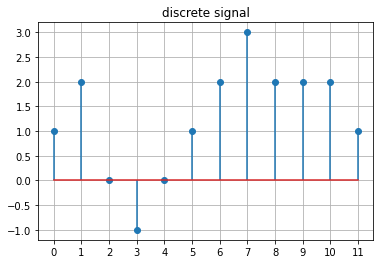

In [15]:
# discrete signal
x = np.array([1, 2, 0, -1, 0, 1, 2, 3, 2, 2, 2, 1])

plt.stem(x)
plt.xticks(np.arange(len(x)))
plt.grid()
plt.title('discrete signal')

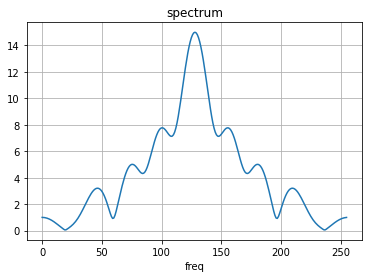

In [16]:
# spectrum 

X = fft(x, 256)

# plotting module

plt.plot(np.abs(fftshift(X)))
plt.xlabel('freq')
plt.title('spectrum')
plt.grid()

Text(0.5, 1.0, 'phase')

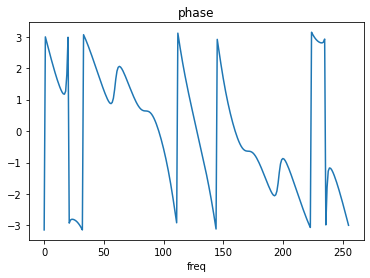

In [42]:
# spectrum phase
plt.plot(np.angle(fftshift(X)))
plt.xlabel('freq')
plt.title('phase')

# Spectrograms

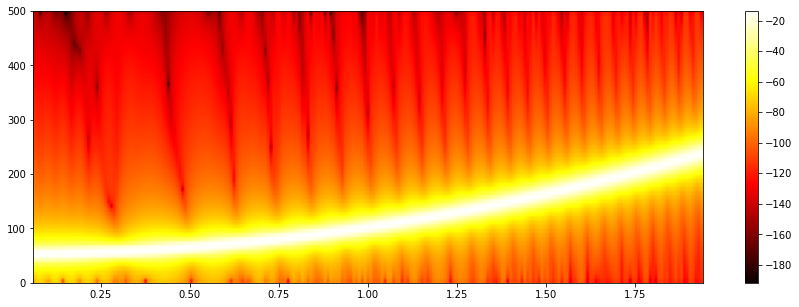

In [7]:
dt = 0.001
t = np.arange(0, 2, dt)
f0 = 50 
f1 = 250 
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t, 2)/(3*t1**2)))

fs = 1 / dt 

plt.figure(figsize=(15, 5))
plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120, cmap='hot')
plt.colorbar()

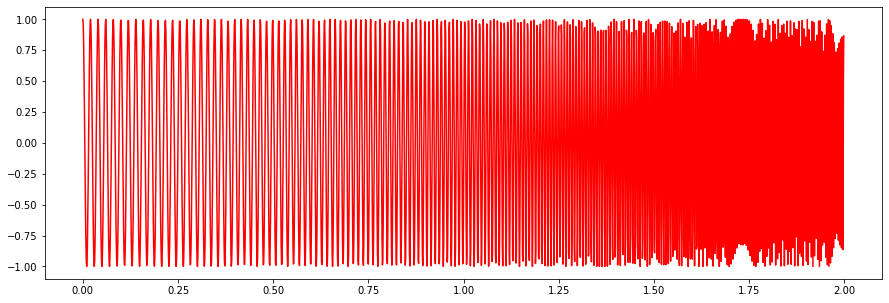

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(t, x, c='red')

Text(0.5, 1.0, 'Spectrum')

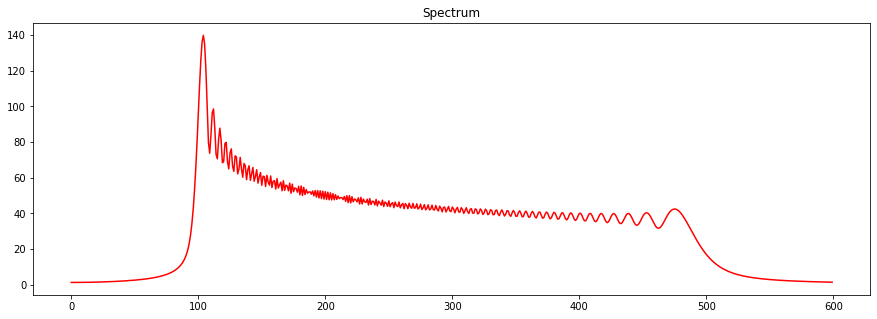

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(np.abs(fft(x)[:600]), c='red')
plt.title('Spectrum')

# Sound to specgram

In [6]:
samplingFrequency, signalData = wavfile.read('geese_old.wav')

In [50]:
signalData.dtype # 16-bit integer PCM (pulse code modulation), 2 channels

dtype('int16')

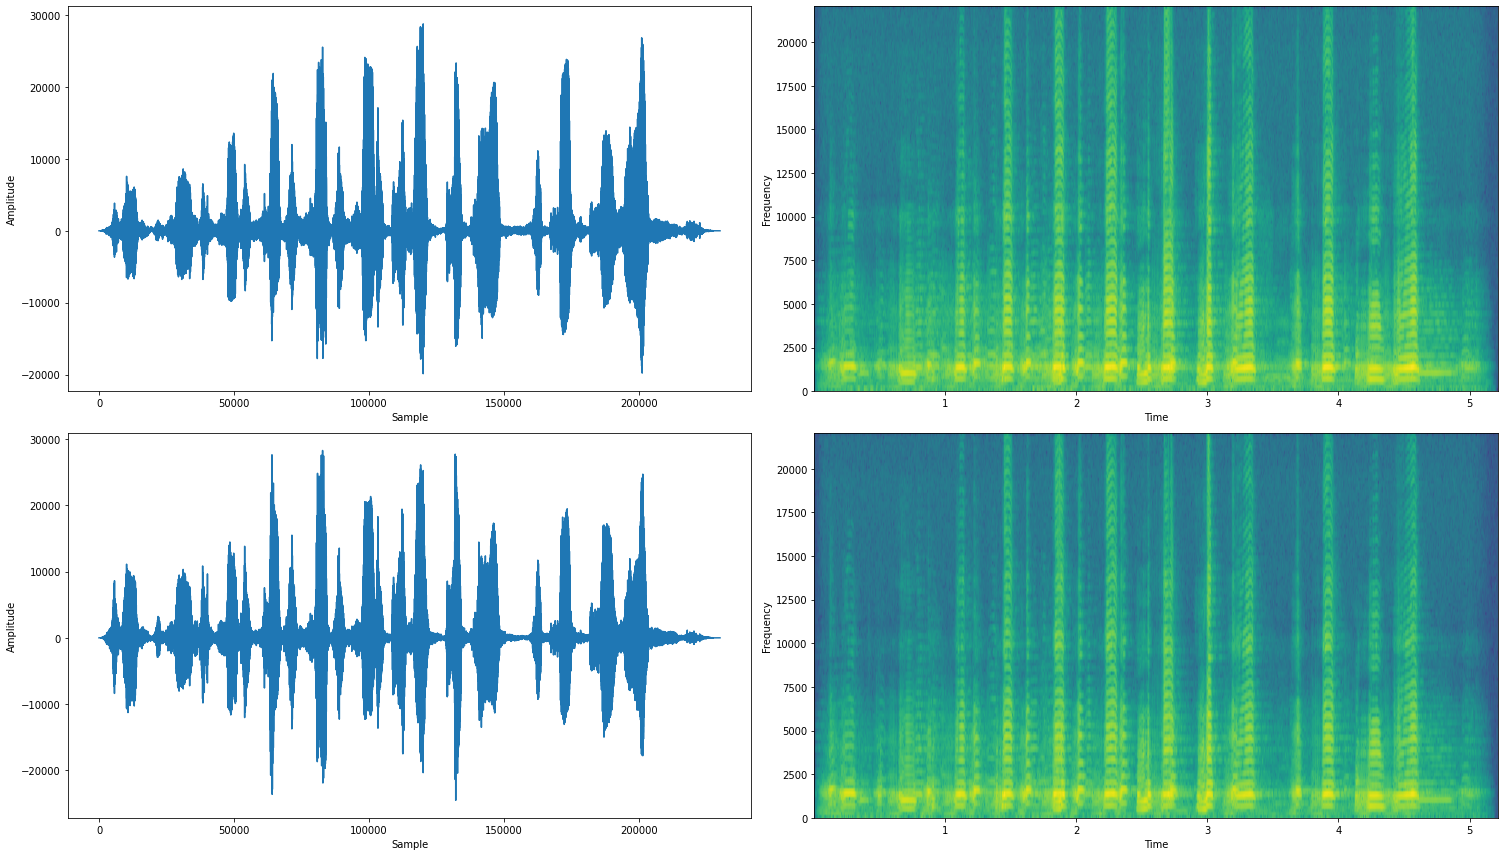

In [58]:
fig, axes = plt.subplots(figsize=(21, 12), nrows=2, ncols=2)

axes[0][0].plot(signalData[:, 0])
axes[0][0].set_xlabel('Sample')
axes[0][0].set_ylabel('Amplitude')

axes[0][1].specgram(signalData[:, 0],Fs=samplingFrequency)
axes[0][1].set_xlabel('Time')
axes[0][1].set_ylabel('Frequency')

axes[1][0].plot(signalData[:, 1])
axes[1][0].set_xlabel('Sample')
axes[1][0].set_ylabel('Amplitude')

axes[1][1].specgram(signalData[:, 1],Fs=samplingFrequency)
axes[1][1].set_xlabel('Time')
axes[1][1].set_ylabel('Frequency')

plt.tight_layout()

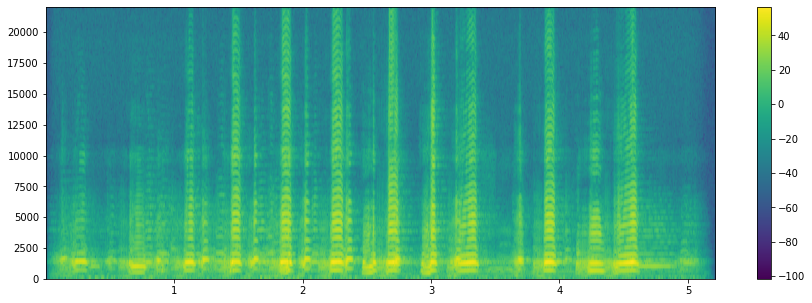

In [91]:
plt.figure(figsize=(15, 5))
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(signalData[:, 0],
                                                                Fs=samplingFrequency, scale='default')
plt.colorbar()

Text(0.5, 1.0, 'Spectrum')

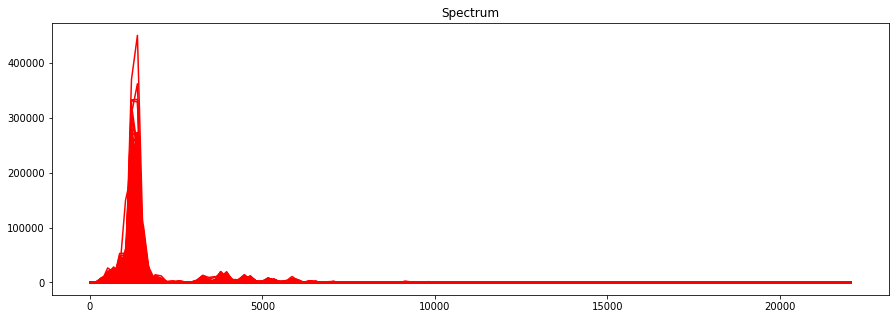

In [47]:
plt.figure(figsize=(15, 5))
plt.plot(frequenciesFound, powerSpectrum, c='red')
plt.title('Spectrum')

In [44]:
time.shape

(1796,)

In [43]:
powerSpectrum.shape

(129, 1796)

/tmp/ipykernel_16168/3836455689.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time, frequenciesFound, np.log10(powerSpectrum)*10)


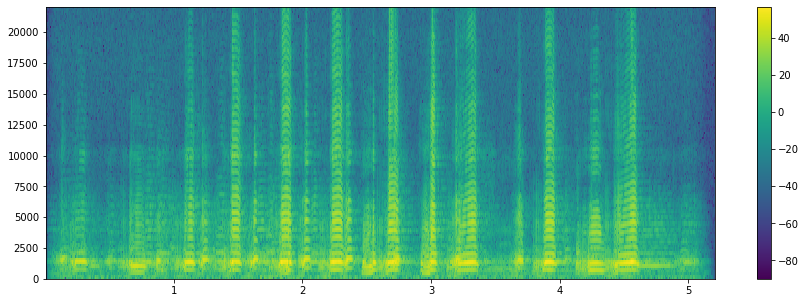

In [92]:
plt.figure(figsize=(15, 5))
plt.pcolormesh(time, frequenciesFound, np.log10(powerSpectrum)*10)
plt.colorbar()

# Librosa

In [90]:
def plot_spectrogram(S, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(25, 10))
    S = librosa.power_to_db(S)
    librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis=y_axis)
    plt.colorbar()

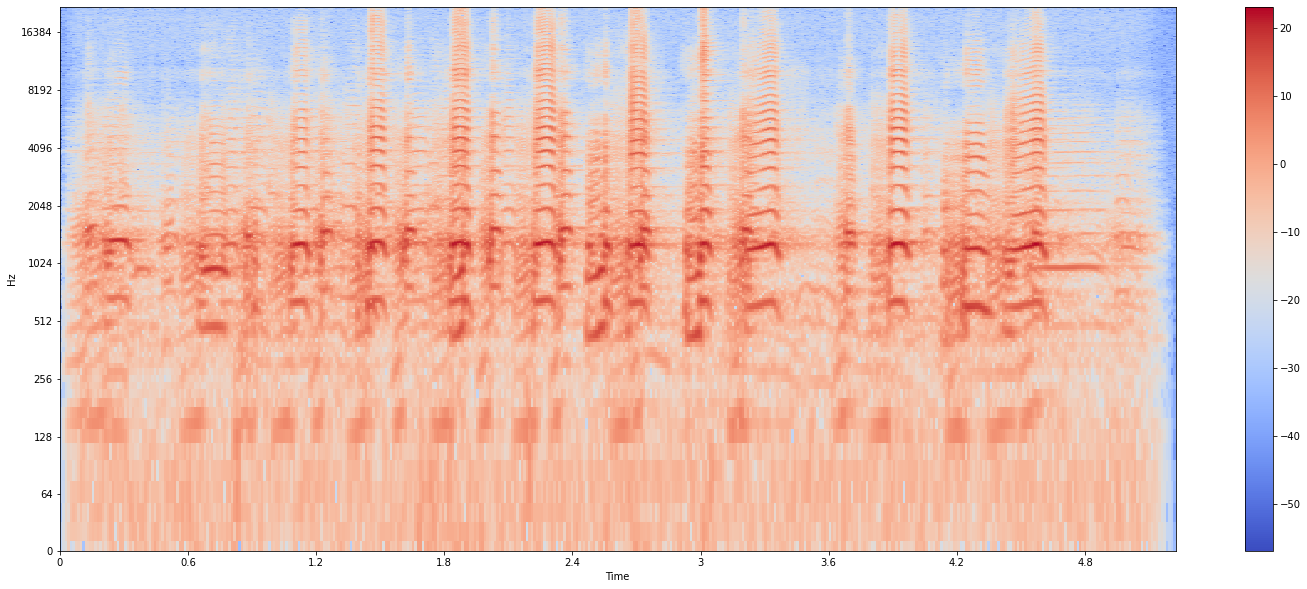

In [100]:
x, sample_rate = librosa.load('geese_old.wav', sr=44100)
x = librosa.stft(x, n_fft=2048, hop_length=512)

plot_spectrogram(np.abs(x), sr=sample_rate, hop_length=512, y_axis='log')
# librosa.frames_to_time(range(spectrogram.shape[1]), sr=samplingFrequency, hop_length=512)
# librosa.fft_frequencies(sr=samplingFrequency, n_fft=2048)

# Spectrogram to sound 

### STFT output
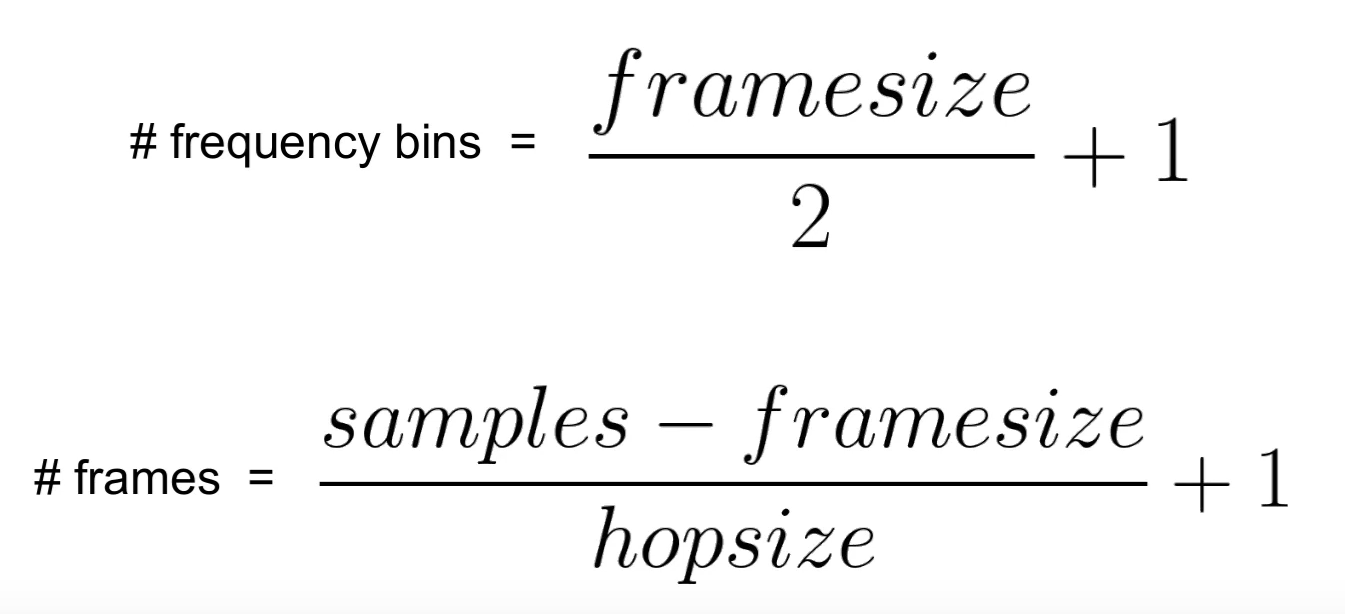

### Frequencies from FT
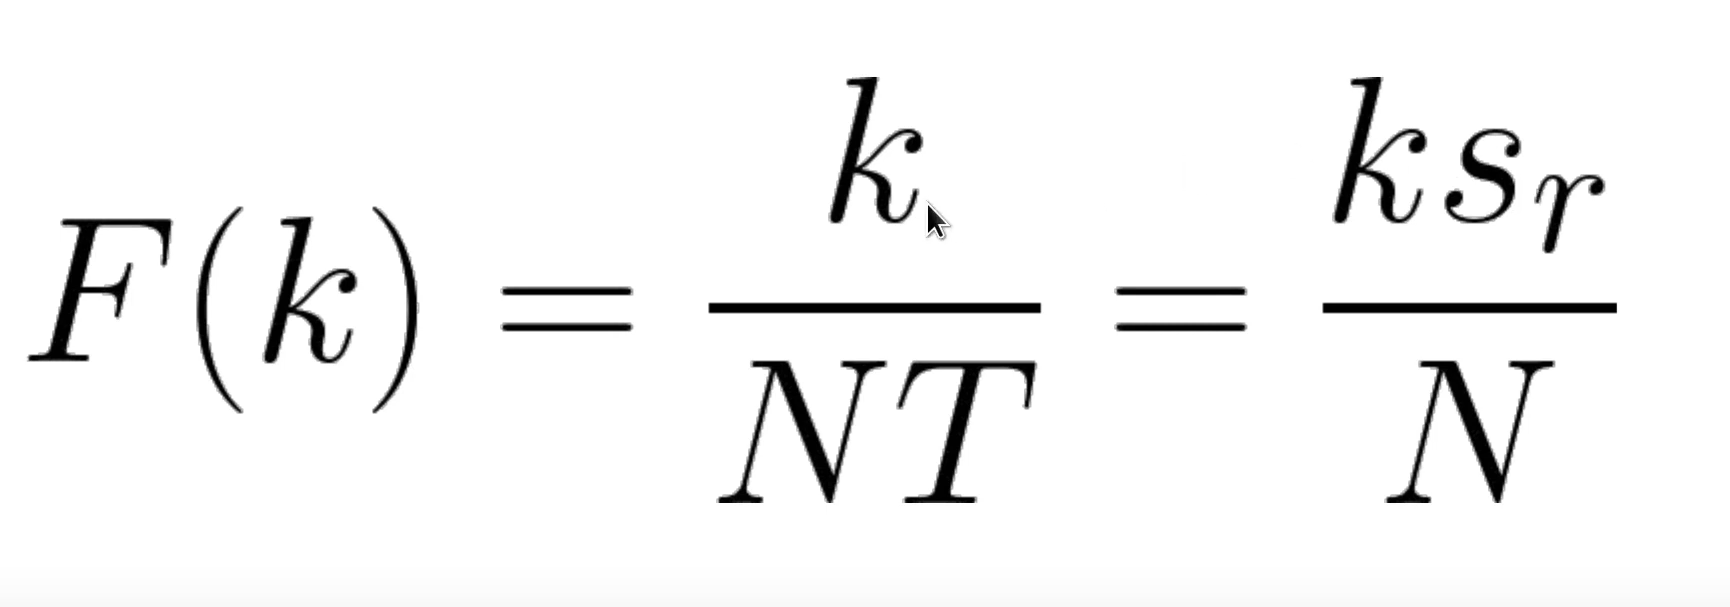

### Max frequency = SR / 2
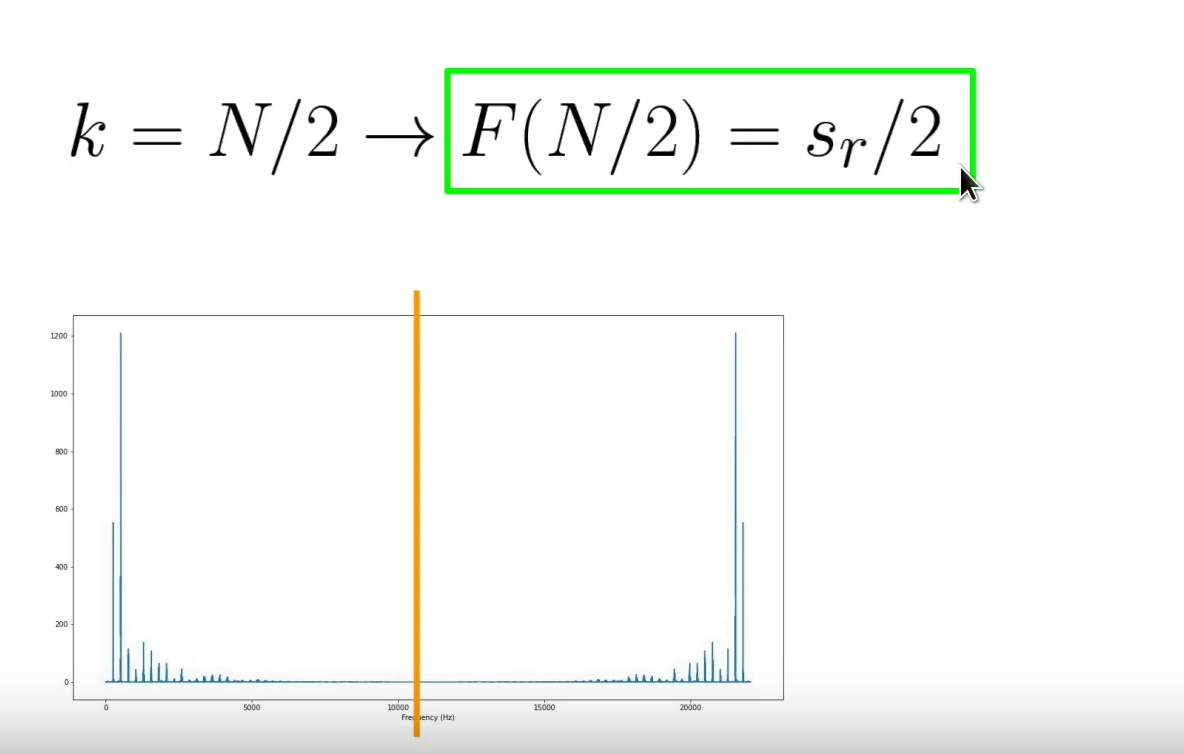

In [2]:
FRAME_SIZE = 2048
SR = 44100
HOP_LENGTH = 512

In [3]:
x, sample_rate = librosa.load('test.wav', sr=SR)
ipd.Audio(x, rate=SR)

In [94]:
x = x[:226816] # n_frames is likely to be integer

# in speech processing, the recommended value is 512,
D = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

mag, actual_phase = librosa.magphase(D)

print(f'x.shape {x.shape}, sample_rate {sample_rate}')
print(f'stft.shape {D.shape} (center=False if n_frames = (n_samples - frame_size) / hop_length + 1 needed')
print(f'mag.shape {mag.shape}, actual_phase.shape {actual_phase.shape}')

x.shape (226816,), sample_rate 44100
stft.shape (1025, 444) (center=False if n_frames = (n_samples - frame_size) / hop_length + 1 needed
mag.shape (1025, 444), actual_phase.shape (1025, 444)


In [95]:
# Trying to reconstruct the phase using the iterative algorithm above.
phase = np.exp(1.j * np.random.uniform(0., 2*np.pi, size=mag.shape))
x_ = librosa.istft(mag * phase, hop_length=HOP_LENGTH)
print(f'x_ (after istft) {x_.shape}')

x_ (after istft) (226816,)


In [96]:
for i in range(100+1):
    _, phase = librosa.magphase(librosa.stft(x_, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH))
    #print(f'phase {phase.shape}')
    x_ = librosa.istft(mag * phase, hop_length=HOP_LENGTH)
    #print(f'x_ {x_.shape}')
    #if i % 10 == 0:
scipy.io.wavfile.write('recon.wav', samplingFrequency, x_)

In [97]:
print(f'x_ {x_.shape}')

x_ (226816,)


In [98]:
ipd.Audio(x_, rate=SR)